<a href="https://colab.research.google.com/github/hwankang/Defense/blob/main/MNIST_without_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL 손글씨 이미지 분류 기법의 이해

* Author: Tensorflow
* Lecture: Jason Dong
* practice Hwan Il (Harry) Kang 2021.01.08 Friday

### 미션: MNIST 손글씨 예제 설명하기

* MNIST 손글씨 데이터 시각화 및 데이터 탐색
* 분석 정확도 개선 수준 측정

### 케라스 활용 방법 소개
#### This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. 신경망모델 이용, 이미지 분류 / Build a neural network that classifies images.
2. 신경망모델 훈련시키기 / Train this neural network.
3. 신경망모델의 성능 평가 / Evaluate the accuracy of the model.

### 1. 텐서플로2 임포트 
#### Import TensorFlow into your program:

* Note: Upgrade `pip` to install the TensorFlow 2 package. 
* See the [install guide](https://www.tensorflow.org/install) for details.

In [ ]:
# 라이브러리 임포트
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Plot ad hoc mnist instances from Keras datasets
from keras.datasets import mnist
import matplotlib.pyplot as plt

print(np.__version__)
print(pd.__version__)

1.19.4
1.1.5


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.4.0


### 2. MNIST 데이터세트 로딩
#### 정수형 데이터를 실수형 데이터로 변환

* Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). 
* Convert the samples from integers to floating-point numbers:

In [ ]:
# .datasets
mnist = tf.keras.datasets.mnist

# 훈련용: (피처, 타겟)
# 검증용: (피처, 타겟)
# load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
# 24x24 픽셀 이미지의 픽셀의 흑백 수준을 정규화
# 원본: 백 0~255 흑
# 정규화: 흑 0 ~ 1 백
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

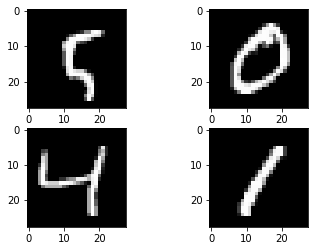

In [ ]:
# 이미지 데이터 시각화 및 탐색
# plot 4 images as gray scale
# subplot()
# imshow()

plt.subplot(221)
plt.imshow(x_train[100], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))

# show the plot
#plt.imshow(22)

### 3. Sequential() 모델 생성
#### 최적화함수와 손실함수 선택

* Build the `tf.keras.Sequential` model by stacking layers. 
* Choose an optimizer and loss function for training:

### 미션: Sequential() 함수의 이해

* Sequential() 기법 이해

* Flatten() 레이어 이해

* Dropout() 레이어 이해

* Dense() 레이어 이해

* Conv2D() 레이어 적용

* MaxPooling2D() 레이어 적용

In [11]:
# Sequential()
# Flatten()
# Dense()
# activation='relu'
# Dropout()

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

### 4. 예측 정확도 지표: 각 데이터에 대한 logits 또는 log-odds 점수 반환
#### (아직은 예측의 정확도를 알기 어려움) 

* For each example 
* the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or 
* "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [12]:
# model()

predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.08453082,  0.10635234, -1.0313227 ,  0.31917936, -0.28572944,
         0.5200302 , -0.12222372,  0.62689406, -0.11164451,  0.06483753]],
      dtype=float32)

### 5. 예측 정확도: softmax 함수를 이용, 정확한 예측의 확률로 변환

* The `tf.nn.softmax` function converts these logits 
* to "probabilities" for each class: 

In [13]:
# softmax()

tf.nn.softmax(predictions).numpy()

array([[0.09817296, 0.10033879, 0.03216495, 0.12413619, 0.06779379,
        0.15174936, 0.07983614, 0.16886406, 0.08068522, 0.09625852]],
      dtype=float32)

#### 참고: `tf.nn.softmax`를 활성화 함수의 마지막 레이어로 추가 가능 (권장 않음)

* Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. 

* While this can make the model output more directly interpretable, 

* this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models 
* when using a softmax output. 

### 6. 손실함수 설정


* The `losses.SparseCategoricalCrossentropy` loss 
* takes a vector of logits 
* and a `True` index and returns a scalar loss for each example.

In [14]:
# .losses
# SparseCategoricalCrossentropy()
# from_logits

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#### 훈련 전 모델의 손실함수 값의 범위
##### 음수가 올바른 분류, 0은 정확

* This loss is equal to the negative log probability of the true class:

* It is zero if the model is sure of the correct class.

* This untrained model gives probabilities close to random (1/10 for each class), 
* so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [15]:
# loss_fn()

loss_fn(y_train[:1], predictions).numpy()

1.8855251

### 7. 모델 컴파일

* 최적화함수
* 손실함수
* 지표 

In [17]:
# compile()
# optimizer
# loss
# metrics

model.compile( optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

### 8. 모델 훈련
#### 손실함수를 최소화할 수 있는 파라미터 조정

* 피처 데이터: x
* 타겟 데이터: y
* 반복시행 횟수: epochs
* The `Model.fit` method 
* adjusts the model parameters to minimize the loss: 

In [19]:
# fit()
# 피처 훈련데이터
# 타겟 훈련데이터
# 5회 반복

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4851 - accuracy: 0.8555
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1478 - accuracy: 0.9552
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1080 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0878 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0728 - accuracy: 0.9777


### 9. 모델의 예측 성능 평가

* 피처 데이터: x
* 타겟 데이터: y
* 결과 표시의 방법: verbose
* The `Model.evaluate` method 
* checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [20]:
# evaluate()
# 피처 검증데이터
# 타겟 검증데이터
# 결과 표시 방법: 0~2

model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 995us/step - loss: 0.0736 - accuracy: 0.9771


[0.07358688116073608, 0.9771000146865845]

### 10. 모델 훈련 완료, 활용

* The image classifier is now trained to ~98% accuracy on this dataset. 
* If you want your model to return a probability, 
* you can wrap the trained model, and attach the softmax to it:
* To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

In [21]:
# Sequential()
# Softmax()

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [22]:
# 피처 검증데이터 배열 1까지 출력

probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[8.1315141e-09, 2.1570639e-08, 2.6425536e-05, 5.9557229e-04,
        1.2024395e-10, 6.9878737e-08, 1.4991434e-13, 9.9936587e-01,
        6.4710648e-08, 1.2000094e-05]], dtype=float32)>